In [1]:
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_dataset(file_path):
    """
    Loads json file into pandas dataframe
    :param file_path: Path of a json file (with indent = 4, and newlines after every record)
    :return: pandas dataframe for the loaded file
    """
    file = open(file_path, 'r')
    raw_data = file.read()
    raw_objects = raw_data.split('}\n{')
    raw_objects = ['{' + x + '}' for x in raw_objects]
    raw_objects[0] = raw_objects[0][1:]
    raw_objects[-1] = raw_objects[-1][:len(raw_objects[-1]) -1]

    raw_objects = [json.loads(x) for x in raw_objects]
    df = pd.DataFrame.from_dict(raw_objects)
    return df   
    

In [3]:
diseases_df = load_dataset('Data/knowledge_graph_dataset.json')
# diseases_df = load_dataset("Data/knowledge_graph_dataset_large.json")
print(diseases_df.shape)
print(diseases_df.columns)

(97, 24)
Index(['_id', 'name', 'desc', 'category', 'prevent', 'cause', 'symptom',
       'yibao_status', 'get_prob', 'get_way', 'acompany', 'cure_department',
       'cure_way', 'cure_lasttime', 'cured_prob', 'cost_money', 'check',
       'recommand_drug', 'drug_detail', 'common_drug', 'do_eat', 'not_eat',
       'recommand_eat', 'easy_get'],
      dtype='object')


In [4]:
# Creating subset of dataset
diseases_df = diseases_df[10:30]
diseases_df.shape

(20, 24)

In [5]:
symptom_mapping = list()
for index, row in diseases_df[["name", "symptom"]].iterrows():
    for s in row["symptom"]:
        symptom_mapping.append([row['name'], s])

symptom_mapping_df = pd.DataFrame(symptom_mapping, columns=['disease', 'symptom'])
symptom_mapping_df['relation'] = "relation"
symptom_mapping_df.head()

,disease,symptom,relation
0,Pulmonary hemorrhage - nephritis syndrome,Pulmonary bleeding,relation
1,Pulmonary hemorrhage - nephritis syndrome,difficulty breathing,relation
2,Pulmonary hemorrhage - nephritis syndrome,hemoptysis,relation
3,Pulmonary hemorrhage - nephritis syndrome,shortness of breath,relation
4,Pulmonary hemorrhage - nephritis syndrome,heat with cough,relation


In [6]:
graph = nx.from_pandas_edgelist(symptom_mapping_df, "disease", "symptom", edge_attr=True, create_using=nx.MultiDiGraph())

e:\Projects\HealthcareChatbot\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28082 (\N{CJK UNIFIED IDEOGRAPH-6DB2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Projects\HealthcareChatbot\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30192 (\N{CJK UNIFIED IDEOGRAPH-75F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Projects\HealthcareChatbot\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Projects\HealthcareChatbot\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29748 (\N{CJK UNIFIED IDEOGRAPH-7434}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\Projects\HealthcareChatbot\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21872 (\N{CJK UNIFIED IDEOGRAPH-5570}) missing f

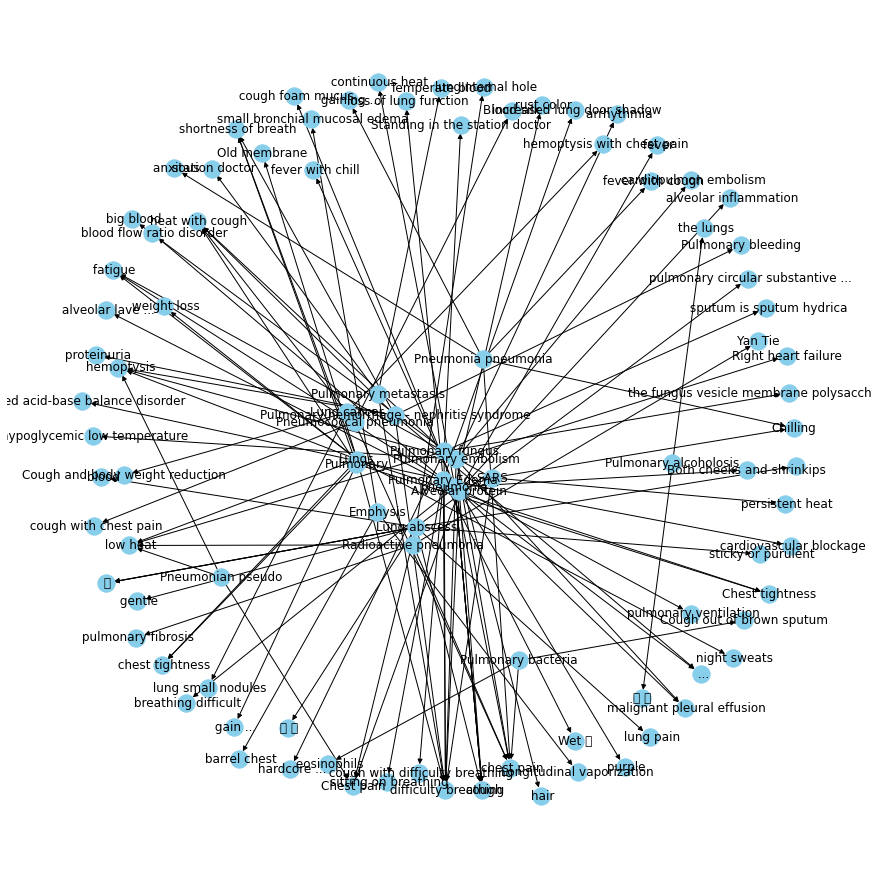

In [7]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()